# (08) Rebuttal Fig -- Pi (```GABAN```)

**Motivation**: This includes every plot that requires some form of memberships plotted. Namely:

1. All modalities (used with HRF filtered): ```supplementary```
2. Only 2 CA conditions (used with Unfiltered): ```rebuttal```
3. Full range, but each community on its own: ```rebuttal```

<br>

In [1]:
# HIDE CODE


import os, sys
from IPython.display import display

# tmp & extras dir
git_dir = os.path.join(os.environ['HOME'], 'Dropbox/git')
extras_dir = os.path.join(git_dir, 'jb-Ca-fMRI/_extras')
fig_base_dir = os.path.join(git_dir, 'jb-Ca-fMRI/figs')
tmp_dir = os.path.join(git_dir, 'jb-Ca-fMRI/tmp')

# GitHub
sys.path.insert(0, os.path.join(tmp_dir, '_Ca-fMRI-Feb11'))
from figures.fighelper import *
from analysis.final import *
from utils.render import *

# warnings, tqdm, & style
warnings.filterwarnings('ignore', category=DeprecationWarning)
from tqdm.notebook import tqdm
%matplotlib inline
set_style()

## Prepare

In [2]:
mice = Mice(512)
kws_show = show_kws(7)
kws_show['figsize_x'] = 5.0

translation = {'BOLD': BOLD, 'CAS': CAS, 'CAF': CAF}
kws_fig = dict(bbox_inches='tight', dpi=300, transparent=True)
fig_dir = pjoin(fig_base_dir, 'rebuttal', 'memberships')
print(fig_dir)

/home/hadi/Dropbox/git/jb-Ca-fMRI/figs/rebuttal/memberships

In [3]:
%%time

results = similiarity_results(
    mice=mice,
    perc=15,
    num_k=7,
    merge_thres=0.444,
    n_resamples=None,
)
bt = BootStrap(**results['props_ca'])
list(results)

CPU times: user 12.5 s, sys: 6.23 s, total: 18.7 s
Wall time: 18.3 s


['bt_dict', 'props_bo', 'props_ca', 'pi_sorted', 'sim', 'sim_overall']

## Save figs (together and one by one)

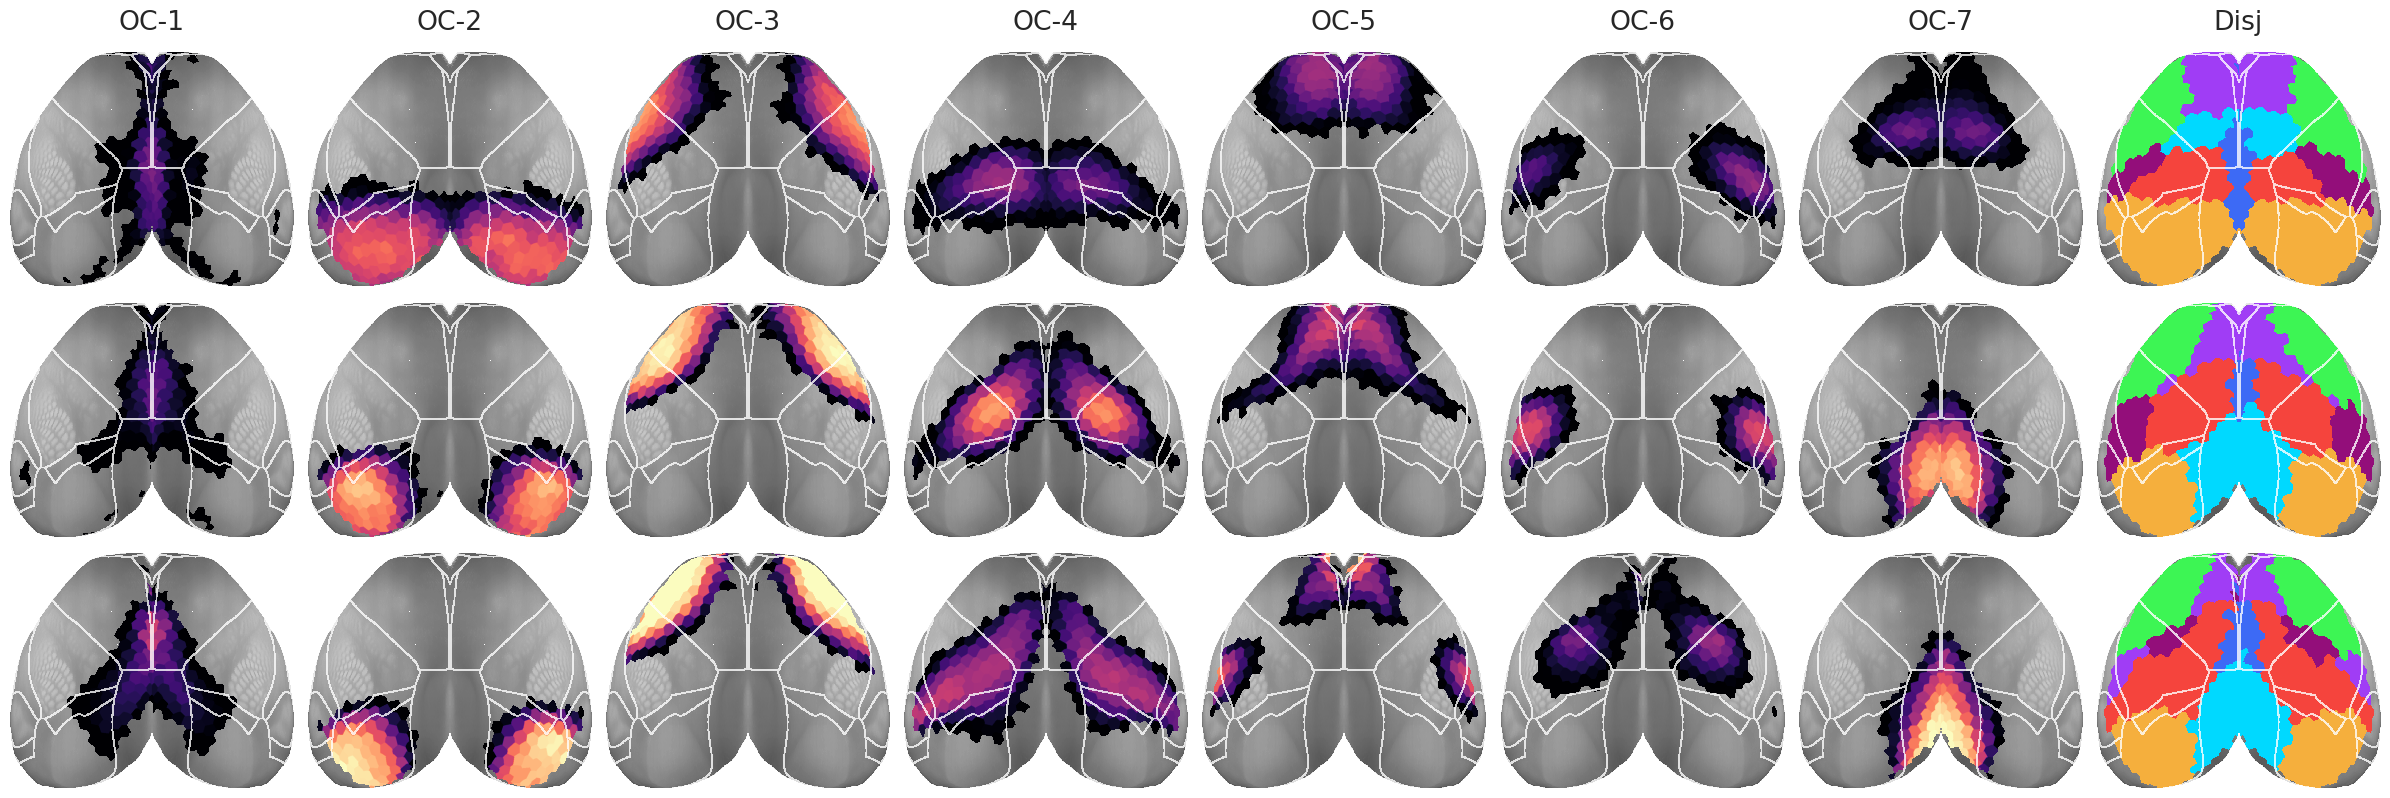

CPU times: user 44.5 s, sys: 439 ms, total: 45 s
Wall time: 45 s


In [4]:
%%time

_ = bt.show(results['pi_sorted'], **kws_show)

### All modalities together

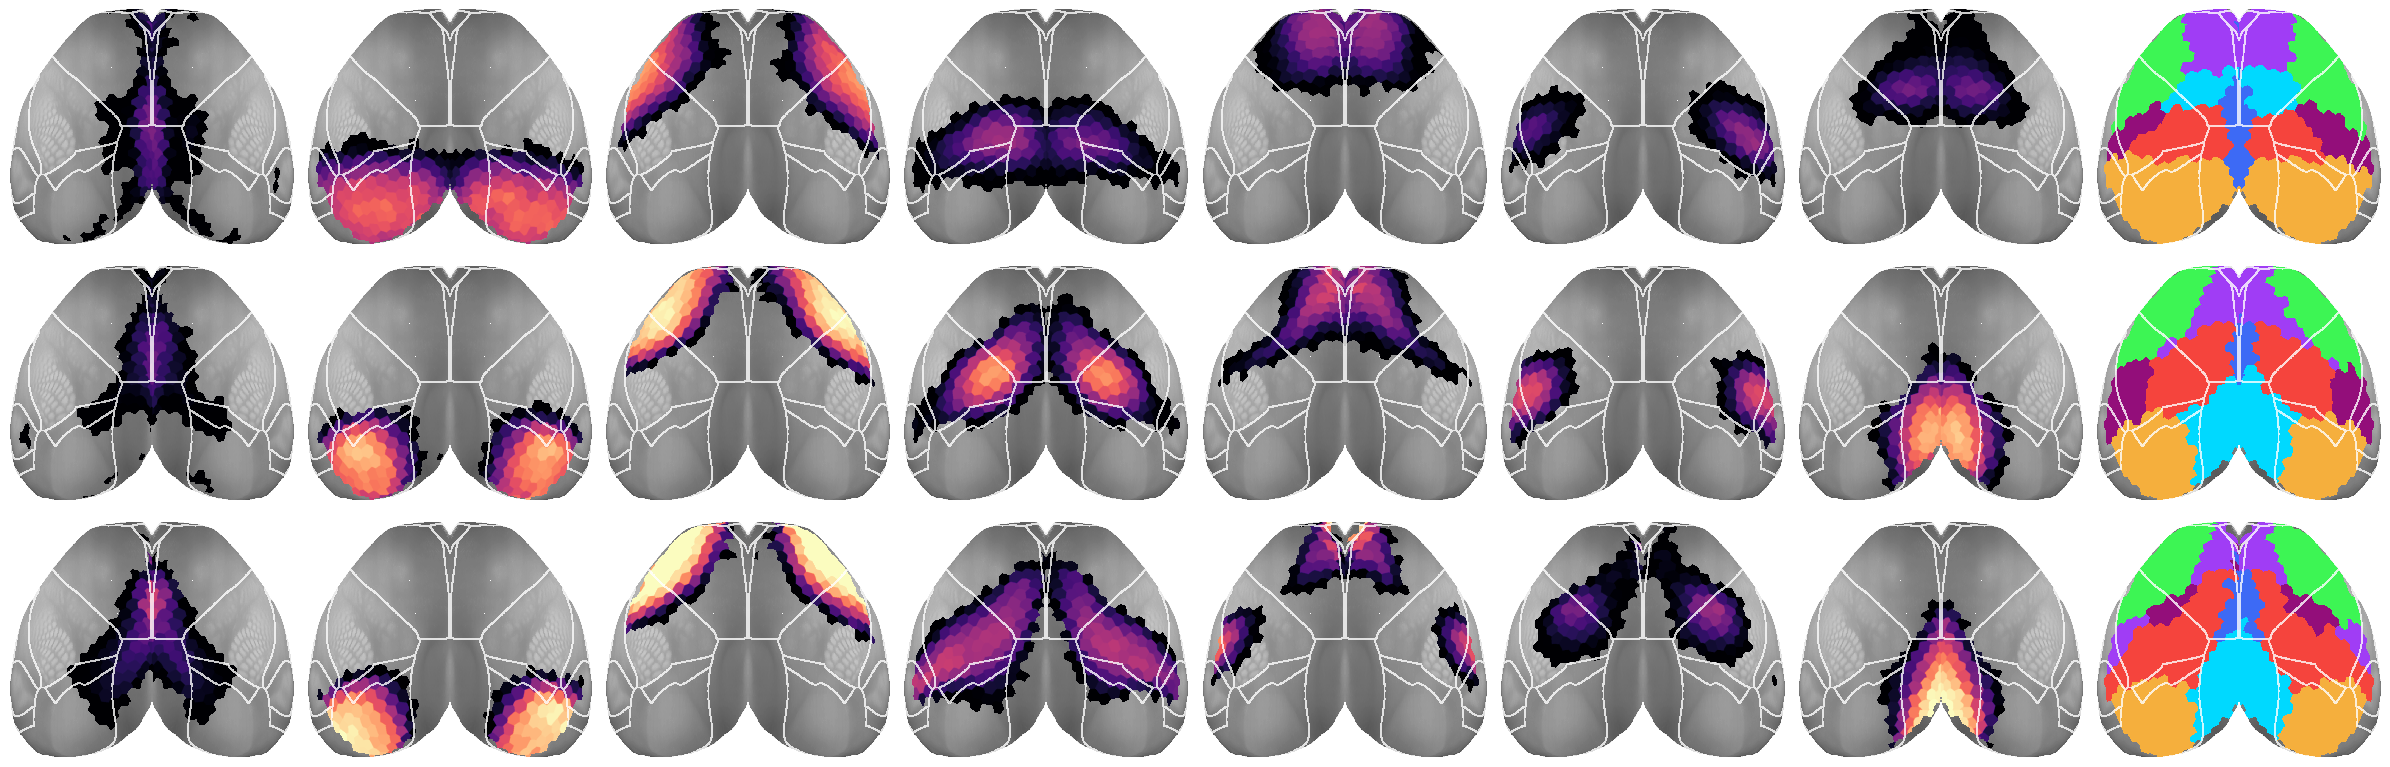

In [5]:
kws_show.update(dict(
    add_ylabels=False,
    add_title=False,
    display=False,
))
fig, axes = bt.show(results['pi_sorted'], **kws_show)

fig.savefig(pjoin(fig_dir, 'pi_gaban_all.png'), **kws_fig)
display(fig)

### Each one separately

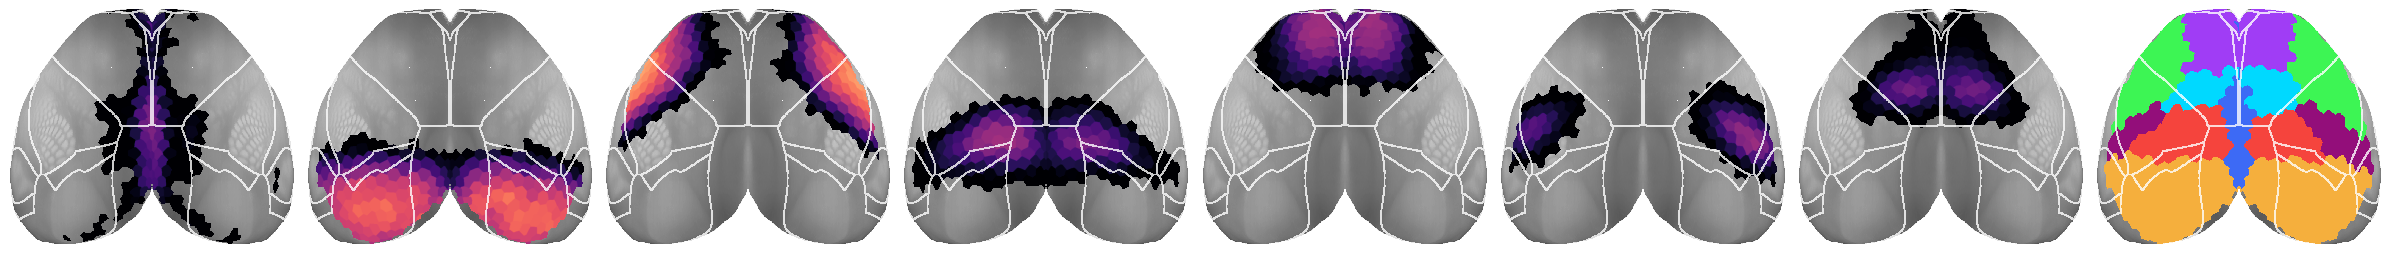

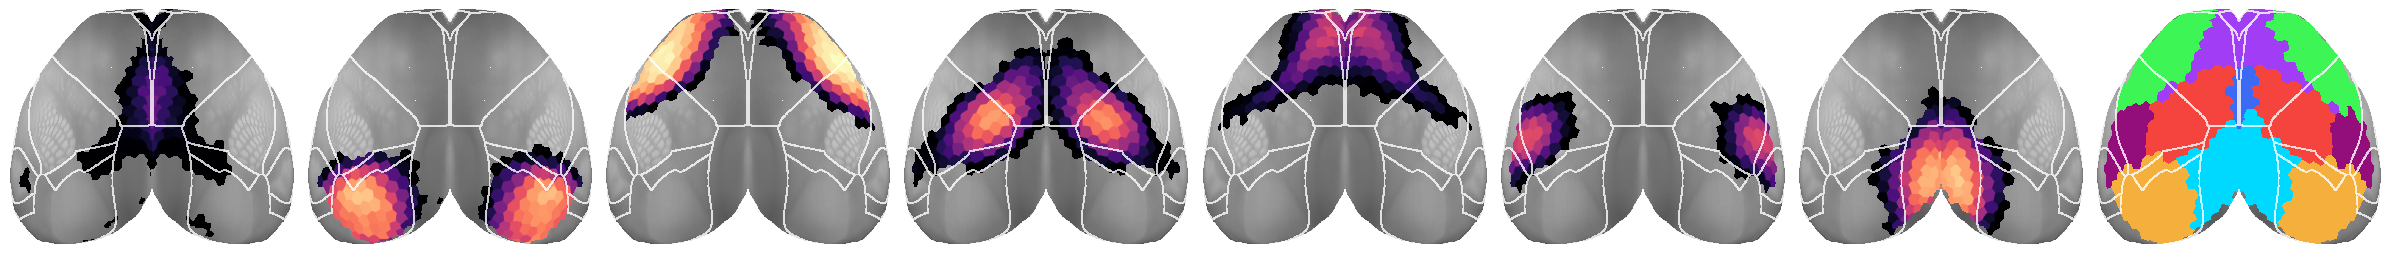

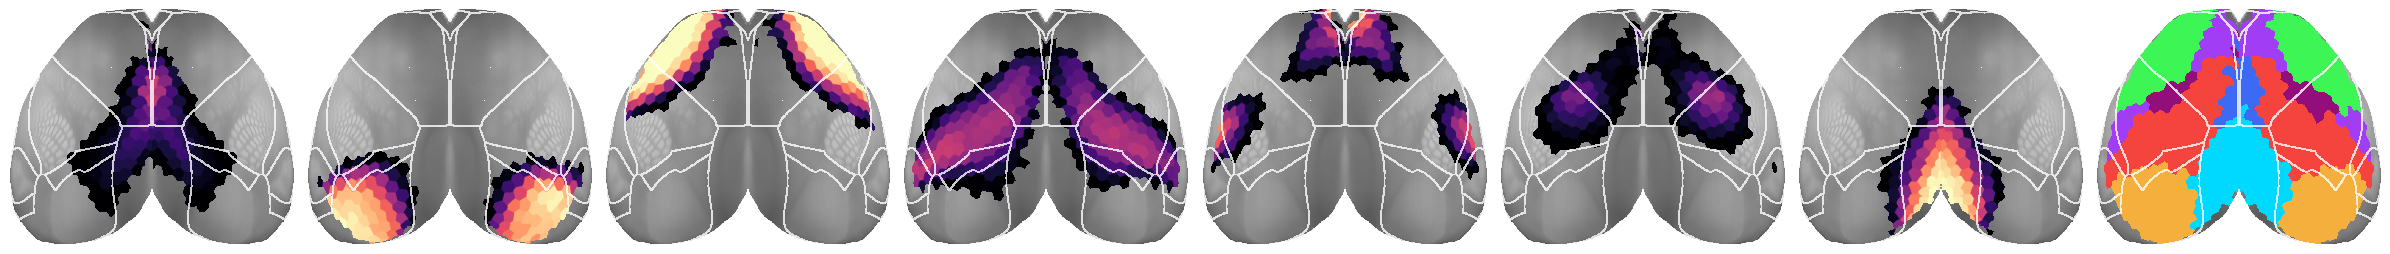

In [6]:
for label, mode in translation.items():
    fig, axes = bt.show(results['pi_sorted'][mode], **kws_show)
    fig.savefig(pjoin(fig_dir, f'pi_gaban_{label}.png'), **kws_fig)
    display(fig)

In [7]:
kws_show

{
    'vmin': 0.2,
    'vmax': 0.9,
    'mask_thresh': 0.14285714285714285,
    'add_disjoint': True,
    'add_title': False,
    'figsize_x': 5.0,
    'add_ylabels': False,
    'display': False
}

## Full range (each community separately)

In [8]:
kws_show.update(dict(
    add_disjoint=False,
    add_ylabels=False,
    add_title=False,
    display=False,
    vmin=0.0,
    vmax=1.0,
    mask_thresh=1e-9,
))

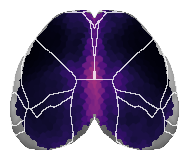

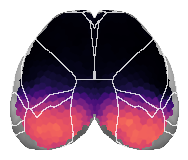

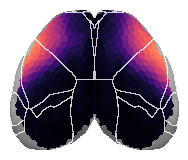

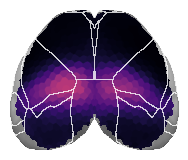

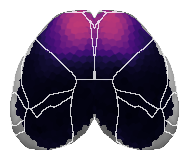

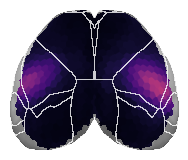

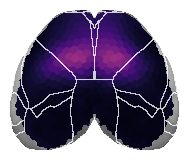

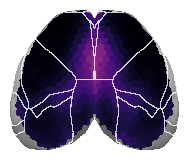

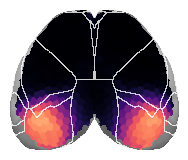

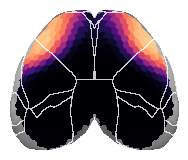

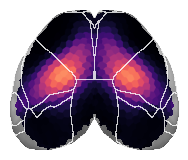

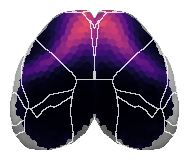

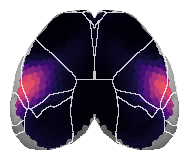

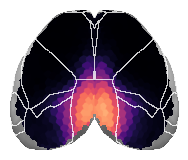

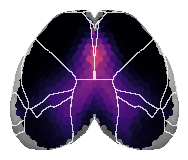

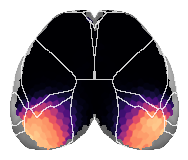

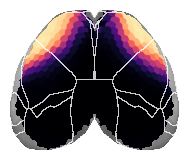

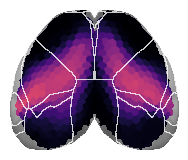

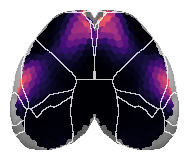

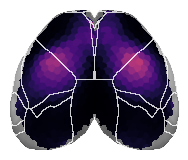

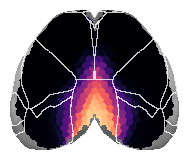

In [9]:
for label, mode in translation.items():
    for i, x in enumerate(results['pi_sorted'][mode]):
        fname = pjoin(fig_dir, 'fullrange_ocs', f'{label}_OC{i+1}.png')
        fig, axes = bt.show(x, **kws_show)
        fig.savefig(fname, **kws_fig)
        display(fig)